In [13]:
import os
import numpy as np
# import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import json

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

In [33]:
def get_label(filename):
    with open(filename,'r') as f:
        labels = json.loads(f.read())
        f.close()
    return labels

def get_prediction(model, img,top=5):
    pred = model.predict(img)
    return decode_predictions(pred,top=top)[0]

def read_img(img_path):
    img = image.load_img(img_path,target_size=(299,299))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    return img

def check_img(model,img_path,labels,top=10):
    img = read_img(img_path)
    pred = get_prediction(model,img,top=top)
    if 'cat' in img_path:
        classes = set(labels['cats'])
    else:
        classes = set(labels['dogs'])
    for item in pred:
        if str(item[0]) in classes:
            return True
    return False

def get_mislabel_list(img_dir,model,labels,top=10):
    img_list = os.listdir(img_dir)
    mislabel_list = []
    
    for fname in tqdm(img_list):
        img_path = os.path.join(img_dir, fname)
        if not check_img(model, img_path, labels, top=top):
            mislabel_list.append(img_path)
    return mislabel_list
        

In [34]:
labels = get_label("labels.txt")
model = InceptionV3(weights='imagenet')
img_dir = '../data/train'

mislabel_list = get_mislabel_list(img_dir, model, labels, top=50)

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [28:01<00:00, 14.87it/s]


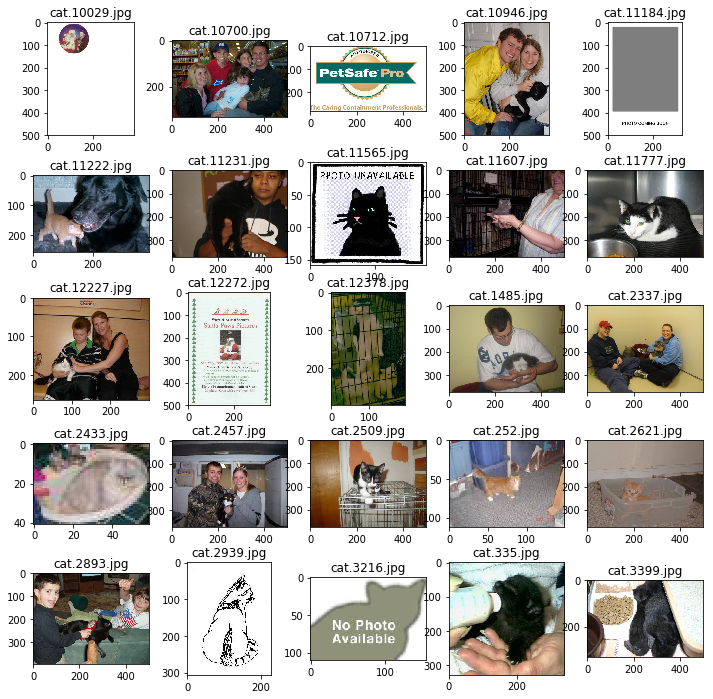

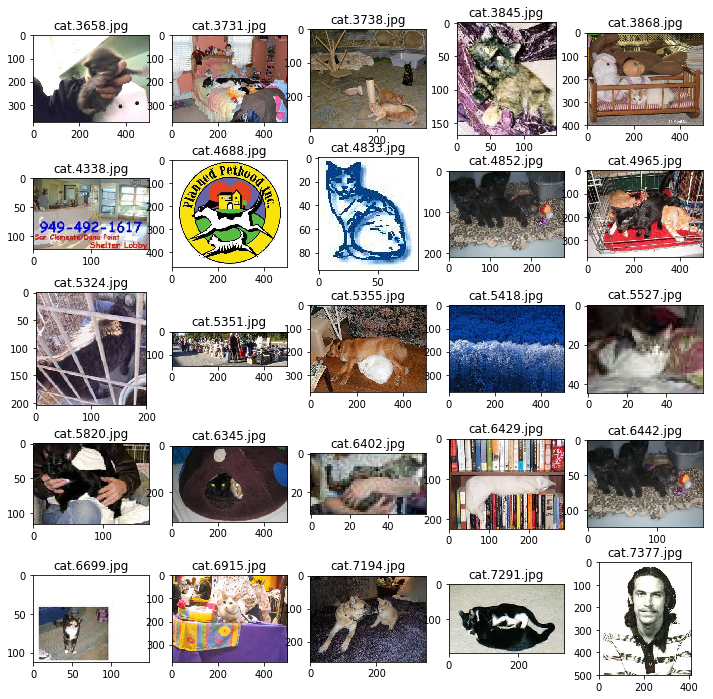

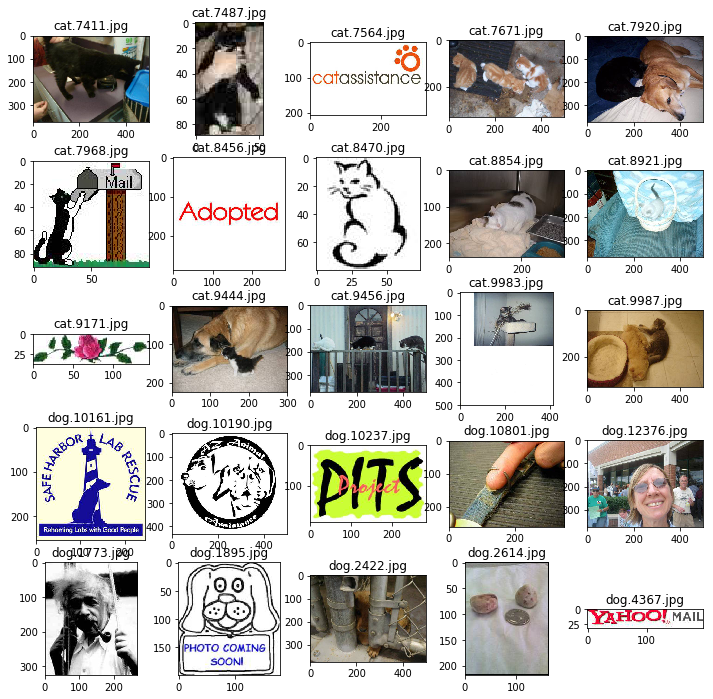

In [39]:
fig,ax = plt.subplots(5,5,figsize=(12,12))

i=0
j=0
for k,img_path in enumerate(mislabel_list[:25]):
    img = plt.imread(img_path)
    i = k // 5
    j = k % 5
    ax[i,j].set_title(img_path.split('\\')[-1])
    ax[i,j].imshow(img)
    
plt.show()

fig,ax = plt.subplots(5,5,figsize=(12,12))
for k,img_path in enumerate(mislabel_list[25:50]):
    img = plt.imread(img_path)
    i = k // 5
    j = k % 5
    ax[i,j].set_title(img_path.split('\\')[-1])
    ax[i,j].imshow(img)
plt.show()

fig,ax = plt.subplots(5,5,figsize=(12,12))
for k,img_path in enumerate(mislabel_list[50:75]):
    img = plt.imread(img_path)
    i = k // 5
    j = k % 5
    ax[i,j].set_title(img_path.split('\\')[-1])
    ax[i,j].imshow(img)

plt.show()

In [42]:
for fname in  mislabel_list:
    os.remove(fname)

In [40]:
DATA_DIR = "../data"
TRAIN_DIR = os.path.join(DATA_DIR,"train")
TEST_DIR = os.path.join(DATA_DIR,"test")

def generate_new_dir(train_dir, classes):
    train_set = os.listdir(train_dir)
    random.shuffle(train_set)
    new_train_dir = train_dir + "_2"

    if not os.path.exists(new_train_dir):
        os.mkdir(new_train_dir)
    
    for fname in train_set:
        for label in classes:
            if fname.startswith(label):
                if not os.path.exists(os.path.join(new_train_dir,label)):
                    os.mkdir(os.path.join(new_train_dir, label))
                os.link(os.path.join(train_dir,fname), os.path.join(new_train_dir, label, fname))
                break
    
    print("Finished generate symbol link for all images")
    return new_train_dir

In [43]:
NEW_TRAIN_DIR = generate_new_dir(TRAIN_DIR, ['dog','cat'])

Finished generate symbol link for all images


In [ ]:
def analysis_dataset(train_dir):
    classes = os.listdir(train_dir)
    width_info = []
    height_info = []
    count_info = []
    for c in classes:
        img_set = os.listdir(os.path.join(train_dir, c))
        count_info.append(len(img_set))
        for fname in img_set:
            img = Image.open(os.path.join(train_dir, c, fname))
            width_info.append(img.size[0])
            height_info.append(img.size[1])
            
    return classes,count_info, width_info, height_info

def draw_dataset(classes, count_info, width_info, height_info):
    
    plt.bar(np.arange(len(count_info)), count_info)
    plt.xlabel("Category")
    plt.xticks(np.arange(len(classes)), classes)
    plt.ylabel("Sample count")
    plt.title("Dataset classes count")
    plt.show()
    
    plt.scatter(width_info, height_info)
    plt.xlabel("width") 
    plt.ylabel("height")
    plt.title("Dataset width-height scatter distribution")
    plt.show()
    
def look_dataset(train_dir, square=5):
    random.seed(2018)
    fig,ax = plt.subplots(square,square,figsize=(12,12))
    
    train_set = os.listdir(train_dir)
    for i in range(square):
        for j in range(square):
            num = random.randint(0, len(train_set))
            img = plt.imread(os.path.join(train_dir,train_set[num]))
            ax[i,j].set_title(train_set[num][:3])
            ax[i,j].imshow(img)   

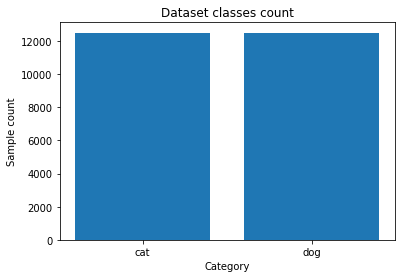

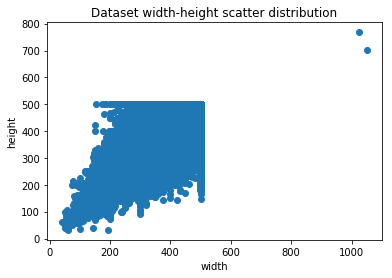

In [7]:
classes, count_info, width_info, height_info = analysis_dataset(NEW_TRAIN_DIR)
draw_dataset(classes, count_info, width_info, height_info)

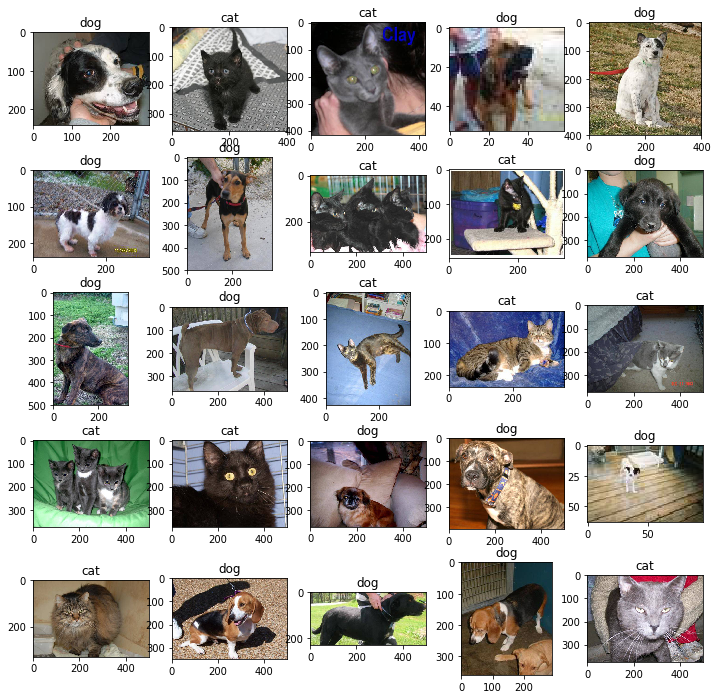

In [12]:
look_dataset(TRAIN_DIR,5)
plt.show()

In [1]:
mislabel_list

NameError: name 'mislabel_list' is not defined